In [4]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [2]:
# Write a function to extract era data - clim or a certain month, for a certain value etc.
# BREAK DOWN INTO SMALLER FUNCTIONS? 
# For now, this function will just plot lat/p plots.
# First, test by extracting same as above, then add functionalities to specify climatology or anomaly etc. 

# Var is a string specifying the variable to extract e.g. 't', 'u'.
# t_min and t_max are strings for the start and end dates over which the data is extracted.
# mean_coord is the coordinate over which the data array is averaged.

# COMPUTE CLIM AND ANOM AS SPECIFIED, THEN CHOOSE WHAT TO PLOT/RETURN BASED ON FUNCTION INPUTS

# clim is a binary value (True or False) used if the era data is being extracted as climatology
# (averaged) rather than simply taken over a specified range. 

# ADD ANOMALY ARGUMENT!

# clim_month is an integer between 1 and 12 specifying the month over which the climatology will be averaged.
# If clim_month is outside the range [1, 12] and clim set to True, the complete climatology over all months will be computed.
# If clim is set to False, the clim_month variable is not used (set to zero for ease of reading).
# If clim is true, there is no need for the t_min and t_max variables. 

def era_extract(var, t_min, t_max, mean_coord, clim, clim_month):
    files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/'+var+'/*/*')
    files.sort()
    era_all = getattr(xr.open_mfdataset(files, combine='by_coords'), var)
    
    era_clim = era_all.groupby('time.month').mean()
    #print(era_clim)
    #print(era_clim.sel(month=10))
    
    fig_era = plt.figure(figsize=(16,16))
    ax_era = fig_era.add_subplot(1, 1, 1)
    #ax_era.set(title = 'era_'+var+'_'+t_min+'_'+t_max+'_mean'+mean_coord)
    
    # ADD A CHECK FOR A t_min, t_max range MORE THAN A MONTH
    if (clim==False):
        era_slice = era_all.sel(time=slice(t_min,t_max))
        #ax_era.set(title = 'era_'+var+'_'+t_min+'_'+t_max+'_mean'+mean_coord)
    elif (clim==True):
        if (1 <= clim_month <= 12):
            era_slice = era_clim.sel(month=clim_month)
        else:
            era_slice = era_clim.mean('month')
            
        
        
    
    era_slice = era_slice.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
    era_slice = StandardGrid(era_slice, lon_name='lon', lat_name='lat')
    
    #print(era_slice)
    
    # Add a statement in here so that the mean is taken over the specified coordinate.
    era_slice_mean = era_slice.mean(mean_coord)
    era_slice_mean = era_slice_mean.squeeze()

    ##era_slice_mean.plot(ax=ax_era)
    era_slice_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=211)
    
    # ADD CONDITION TO TITLING!
    # FOR NOW, I will use the convention that if clim=True, t_min = 1 denotes this, and
    # the t_max value denotes the month (month 0 means all climatology)
    ax_era.set(title = 'era_'+var+'_'+t_min+'_'+t_max+'_mean_'+mean_coord)
    ax_era.invert_yaxis()
    ax_era.set_yscale('log')
    #fig_era.savefig('/home/561/gp8431/fig_era'+var+'_'+t_min+'_'+t_max+'_mean.png')
    
    return fig_era




#era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

##era_anom = era_anom-era_anom.mean('longitude')

#era_anom = era_anom.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

#era_anom = StandardGrid(era_anom, lon_name='lon', lat_name='lat')

#era_anom_oct = era_anom.sel(time=slice('2019-10-01','2019-10-31'))


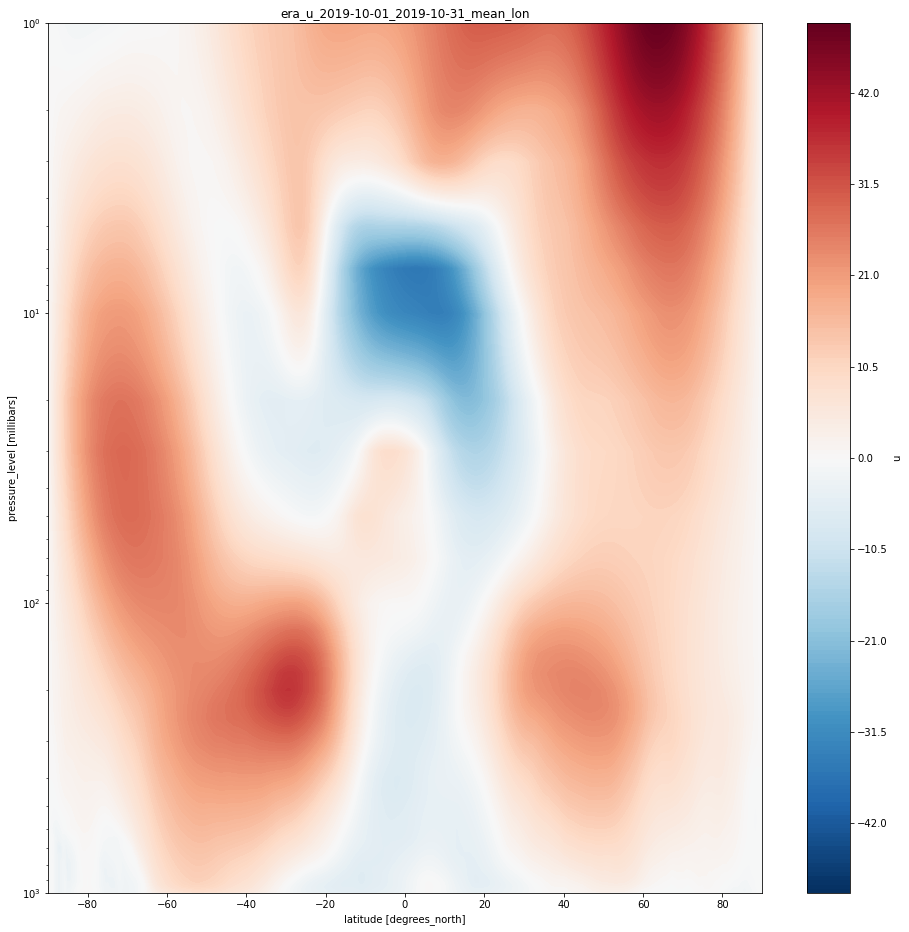

In [3]:
fig_era_u = era_extract('u', '2019-10-01','2019-10-31', 'lon', False, 0)
fig_era_u.savefig('/home/561/gp8431/fig_era_u_oct_19_mean.png')

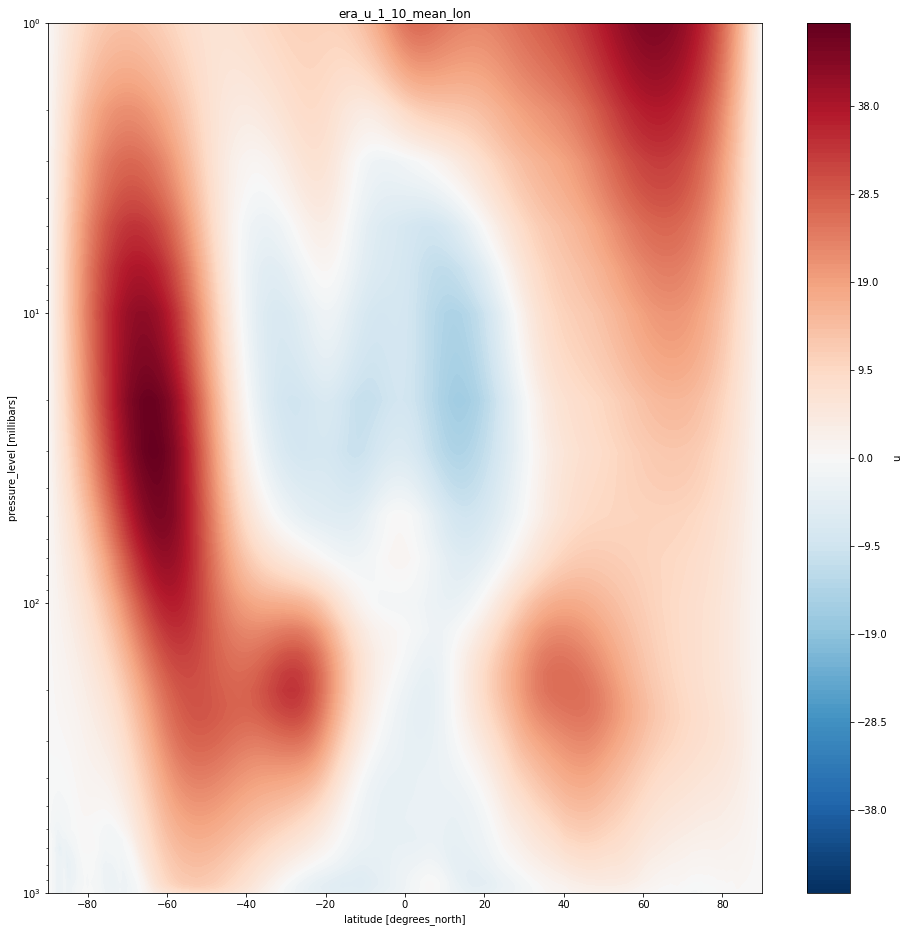

In [4]:
# FOR NOW, I will use the convention that if clim=True, t_min = 1 denotes this, and
# the t_max value denotes the month (month 0 means all climatology)
fig_era_u_oct_clim = era_extract('u', '1','10', 'lon', True, 10)
fig_era_u_oct_clim.savefig('/home/561/gp8431/fig_era_u_oct_clim_mean.png')

In [5]:
#fig_era_u_clim = era_extract('u', '1','all', 'lon', True, 0)
#fig_era_u_clim.savefig('/home/561/gp8431/fig_era_u_clim_mean.png')

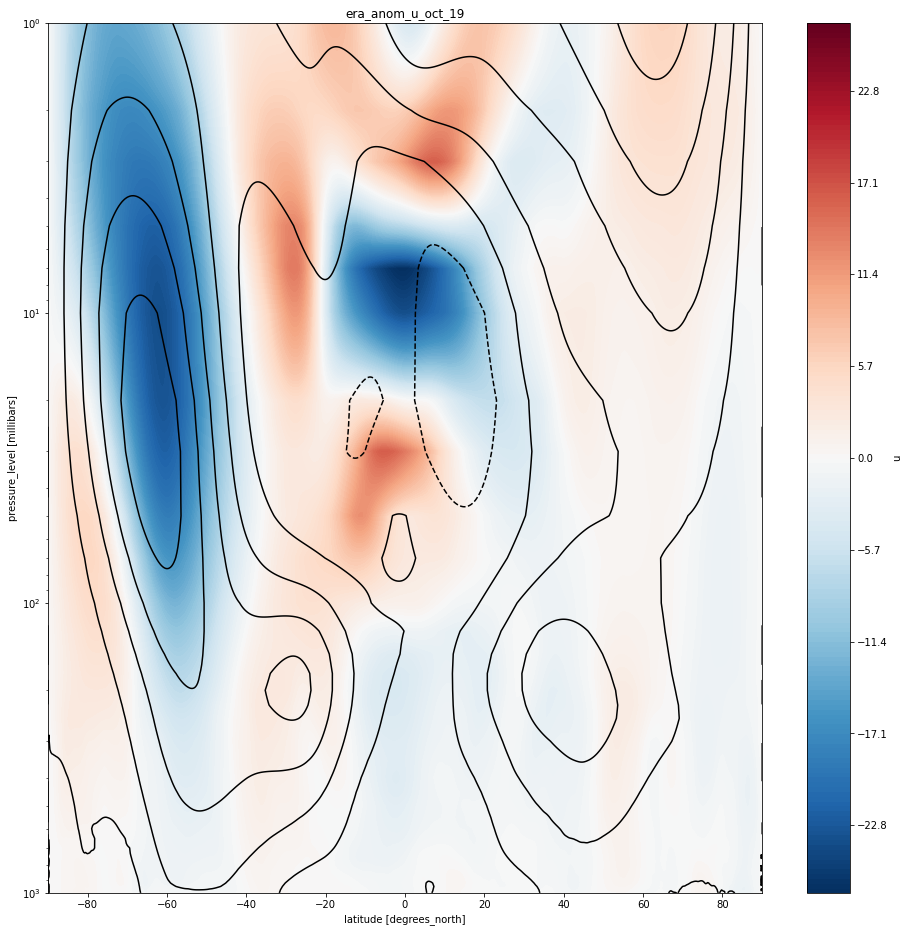

In [6]:
# Here, make a plot of era October anomaly with contours of era October full field climatology.

## CONTENTS OF ABOVE FUNCTION - USE SOME COMP!!
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/u/*/*')
files.sort()
era_all = xr.open_mfdataset(files, combine='by_coords').u

era_clim = era_all.groupby('time.month').mean()
era_clim_oct = era_clim.sel(month=10)
#print(era_clim)
#print(era_clim.sel(month=10))

fig_era = plt.figure(figsize=(16,16))
ax_era = fig_era.add_subplot(1, 1, 1)
#ax_era.set(title = 'era_'+var+'_'+t_min+'_'+t_max+'_mean'+mean_coord)


#era_slice = era_all.sel(time=slice('2019-10-01','2019-10-31'))
#era_slice = era_slice.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
#era_slice = StandardGrid(era_slice, lon_name='lon', lat_name='lat')

era_anom_oct = era_all.sel(time=slice('2019-10-01','2019-10-31'))-era_clim_oct
era_anom_oct = era_anom_oct.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
era_anom_oct = StandardGrid(era_anom_oct, lon_name='lon', lat_name='lat')

era_clim_oct = era_clim_oct.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
#print(era_clim_oct)
era_clim_oct_mean = era_clim_oct.mean('lon')
era_clim_oct_mean = era_clim_oct_mean.squeeze()

#print(era_slice)

# Add a statement in here so that the mean is taken over the specified coordinate.
#era_slice_mean = era_slice.mean('lon')
#era_slice_mean = era_slice_mean.squeeze()

era_anom_oct_mean = era_anom_oct.mean('lon')
era_anom_oct_mean = era_anom_oct_mean.squeeze()

##era_slice_mean.plot(ax=ax_era)
era_anom_oct_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=211)

# ADD CONDITION TO TITLING!
# FOR NOW, I will use the convention that if clim=True, t_min = 1 denotes this, and
# the t_max value denotes the month (month 0 means all climatology)
ax_era.set(title = 'era_anom_u_oct_19')
ax_era.contour(era_clim_oct_mean.lat, era_clim_oct_mean.pfull, era_clim_oct_mean.values, colors='black', levels=np.linspace(-100, 100, 21))
ax_era.invert_yaxis()
ax_era.set_yscale('log')
fig_era.savefig('/home/561/gp8431/fig_era_oct_anom_overlay.png')
#era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

In [7]:
era_clim_oct_mean.pfull

<xarray.DataArray 'pfull' (pfull: 37)>
array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000], dtype=int32)
Coordinates:
  * pfull    (pfull) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    month    int64 10
Attributes:
    units:      millibars
    long_name:  pressure_level

In [5]:
# The below function will extract era figures for comparison in the report.
def era_plots(var, x_axis, y_axis):
    files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/'+var+'/*/*')
    files.sort()
    era_all = getattr(xr.open_mfdataset(files, combine='by_coords'), var)
    g = 9.80665

    if (var=='z'):
        era_all = era_all/g
        fig_era, ax_era, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})
    else:
        fig_era = plt.figure(figsize=(16,16))
        ax_era = fig_era.add_subplot(1, 1, 1) 
        ax_era.invert_yaxis()
        ax_era.set_yscale('log')
    
    era_clim = era_all.groupby('time.month').mean()
    era_clim_oct = era_clim.sel(month=10)

    era_anom_oct = era_all.sel(time=slice('2019-10-01','2019-10-31'))-era_clim_oct
    era_anom_oct = era_anom_oct.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
    era_anom_oct = StandardGrid(era_anom_oct, lon_name='lon', lat_name='lat')

    era_clim_oct = era_clim_oct.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})
    era_clim_oct = StandardGrid(era_clim_oct, lon_name='lon', lat_name='lat')
    
    if (var=='u'):
        era_clim_oct_mean = era_clim_oct.mean('lon')
        era_anom_oct_mean = era_anom_oct.mean('lon')
        era_clim_oct_mean = era_clim_oct_mean.squeeze()
        era_anom_oct_mean = era_anom_oct_mean.squeeze()
        era_anom_oct_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=21)
        ax_era.contour(getattr(era_clim_oct_mean, x_axis), getattr(era_clim_oct_mean, y_axis), era_clim_oct_mean.values, colors='black', levels=np.linspace(-100, 100, 21))
    elif (var=='z'):
        era_clim_oct_mean = era_clim_oct.sel(pfull=250.0)
        era_anom_oct_mean = era_anom_oct.sel(pfull=250.0) 
        era_clim_oct_mean = era_clim_oct_mean.squeeze()
        era_anom_oct_mean = era_anom_oct_mean.squeeze()
        era_anom_oct_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=21, **trans)
        ax_era.contour(getattr(era_clim_oct_mean, x_axis), getattr(era_clim_oct_mean, y_axis), era_clim_oct_mean.values, colors='black')
    elif (var=='t'):
        era_clim_oct_mean = era_clim_oct.sel(lat=0.0)
        era_anom_oct_mean = era_anom_oct.sel(lat=0.0)  
        era_clim_oct_mean = era_clim_oct_mean.squeeze()
        era_anom_oct_mean = era_anom_oct_mean.squeeze()
        era_anom_oct_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=21)
        ax_era.contour(getattr(era_clim_oct_mean, x_axis), getattr(era_clim_oct_mean, y_axis), era_clim_oct_mean.values, colors='black')

    #era_anom_oct_mean.plot.contourf(ax=ax_era, cmap='RdBu_r', levels=21, **trans)

    # IF STATEMENT TO ADD MAP PROJECTIONS!
    ax_era.set(title = 'era_anom_u_oct_19')
    ax_era.contour(getattr(era_clim_oct_mean, x_axis), getattr(era_clim_oct_mean, y_axis), era_clim_oct_mean.values, colors='black', levels=np.linspace(-100, 100, 21))
    #ax_era.invert_yaxis()
    #ax_era.set_yscale('log')
    
    return fig_era

In [ ]:
lon_lat_hght = era_plots('z', 'lon', 'lat')
lon_lat_hght.savefig('/home/561/gp8431/fig_era_lon_lat_hght.png')

#era_anom_aug_700.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', levels=21, **trans)
##ax.contourf(era_anom_lon_aug_700.lon, era_anom_lon_aug_700.lat, era_anom_lon_aug_700.squeeze().values, **trans)
#fig_proj.savefig('/home/561/gp8431/fig_era_hght_lon_coast.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: No contour levels were found within the data range.


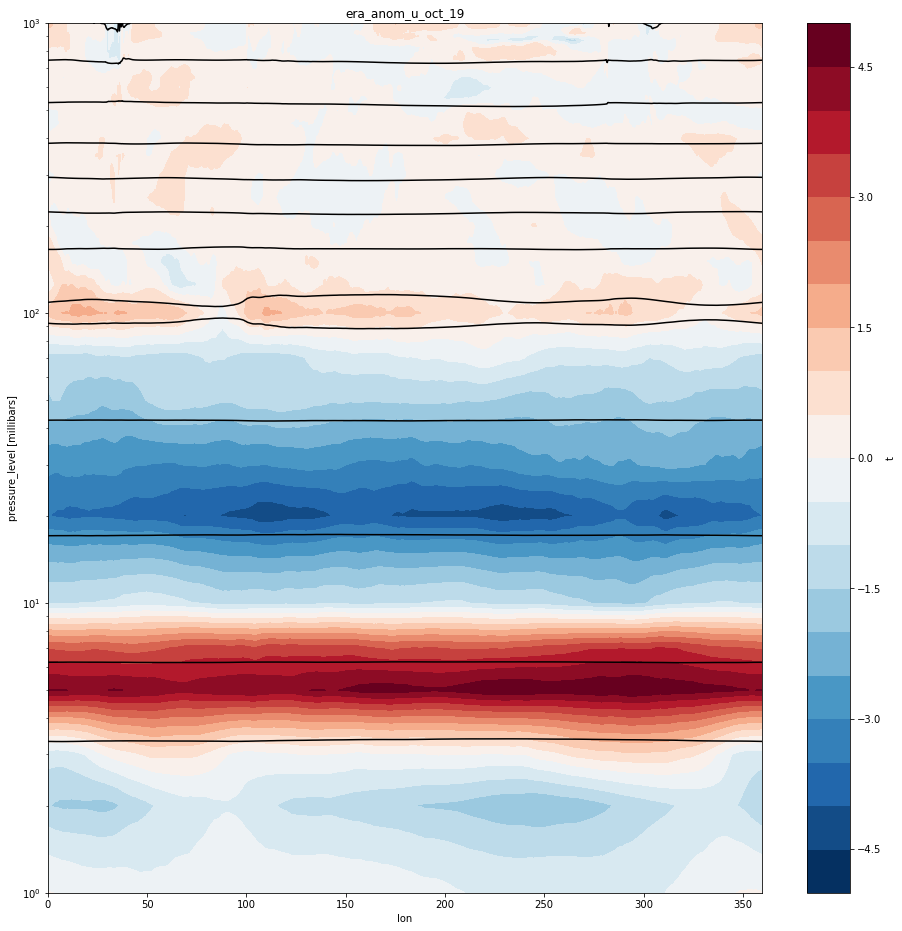

In [10]:
lon_p_temp_eq = era_plots('t', 'lon', 'pfull')
lon_p_temp_eq.savefig('/home/561/gp8431/fig_era_lon_p_temp_eq.png')

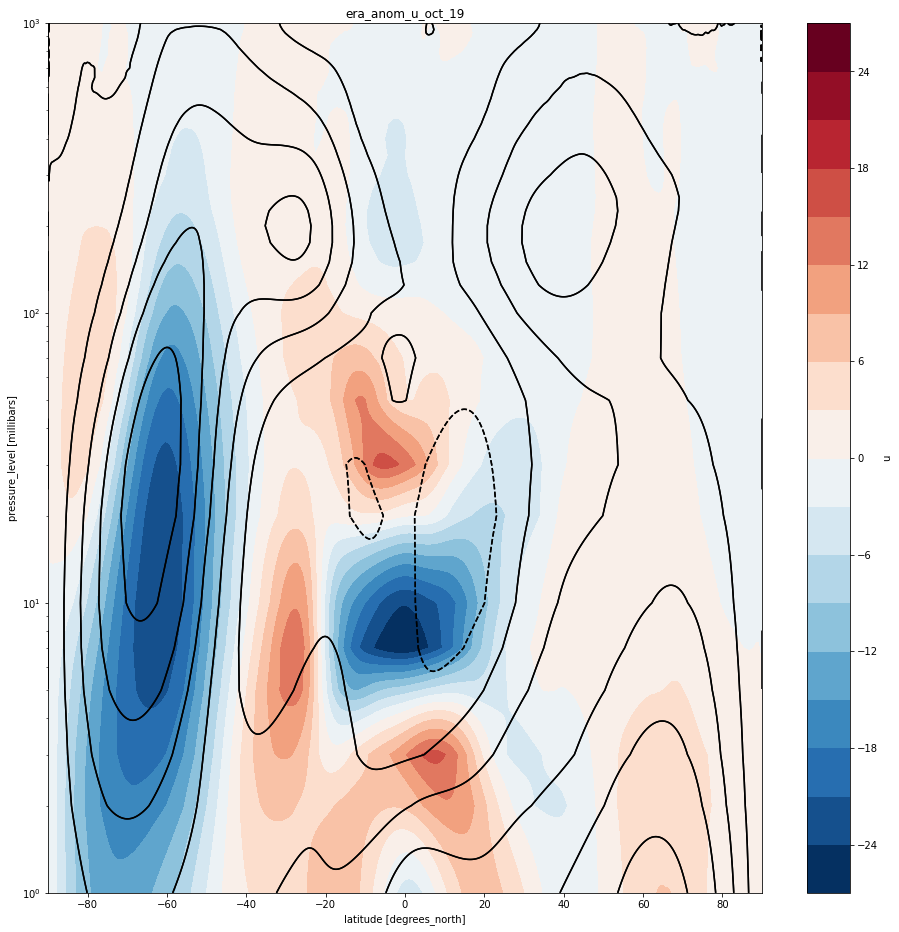

In [11]:
lat_p_ucomp_avg = era_plots('u', 'lat', 'pfull')
lat_p_ucomp_avg.savefig('/home/561/gp8431/fig_era_lat_p_ucomp_avg.png')